Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

Loading the dataset

In [2]:
df=pd.read_csv("C:/Users/Lenovo/Downloads/renfe.csv")
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
1,1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2,2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
3,3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
4,4,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo


In [3]:
df['price'].describe()

count    2.269090e+06
mean     6.338550e+01
std      2.578319e+01
min      1.545000e+01
25%      4.375000e+01
50%      6.030000e+01
75%      7.880000e+01
max      2.142000e+02
Name: price, dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579771 entries, 0 to 2579770
Data columns (total 10 columns):
Unnamed: 0     int64
insert_date    object
origin         object
destination    object
start_date     object
end_date       object
train_type     object
price          float64
train_class    object
fare           object
dtypes: float64(1), int64(1), object(8)
memory usage: 196.8+ MB


Removing the columns that are not required:

In [5]:
df.drop(columns=['insert_date','Unnamed: 0'],inplace=True)
df.head()

,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
1,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
3,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
4,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo


Checking for null values

In [6]:
df.isnull().sum()

origin              0
destination         0
start_date          0
end_date            0
train_type          0
price          310681
train_class      9664
fare             9664
dtype: int64

## Filling the Nan values

In [7]:
df['price'].fillna(df['price'].mean(),inplace=True)
df.isnull().sum()

origin            0
destination       0
start_date        0
end_date          0
train_type        0
price             0
train_class    9664
fare           9664
dtype: int64

In [8]:
df['fare'].value_counts()

Promo                  1733423
Flexible                582743
Adulto ida              179844
Promo +                  73778
Individual-Flexible        214
Mesa                        99
Grupos Ida                   6
Name: fare, dtype: int64

In [9]:
df['fare'].fillna('Promo',inplace=True)
df.isnull().sum()

origin            0
destination       0
start_date        0
end_date          0
train_type        0
price             0
train_class    9664
fare              0
dtype: int64

In [10]:
df['train_class'].value_counts()

Turista               1950303
Preferente             256082
Turista Plus           192908
Turista con enlace     169549
Cama Turista             1051
Cama G. Clase             214
Name: train_class, dtype: int64

In [11]:
df['train_class'].fillna('Turista',inplace=True)
df.isnull().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

## Analysis

Text(0.5,1,'Number of people boarding from different stations')

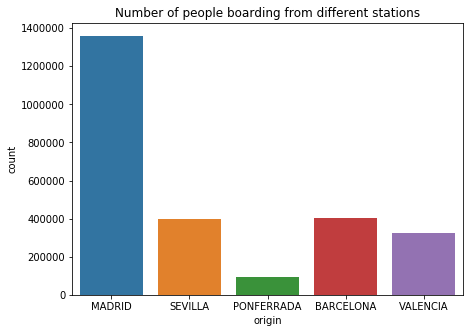

In [12]:
plt.figure(figsize=(7,5))
sns.countplot(df.origin)
plt.title('Number of people boarding from different stations')

Therefore, maximum number of people board Madrid.

Text(0.5,1,'Number of people getting off at different stations')

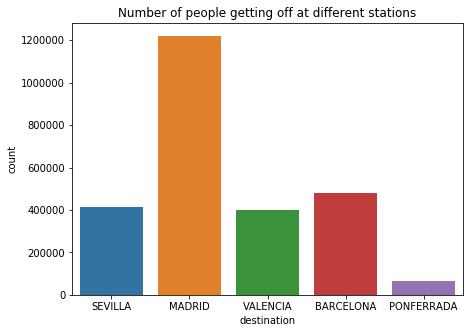

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(df.destination)
plt.title('Number of people getting off at different stations')

The most common destination is also Madrid.

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Train class - Price')

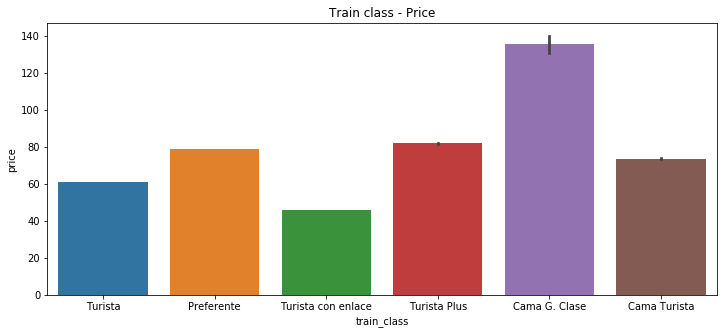

In [14]:
plt.figure(figsize=(12,5))
sns.barplot(x='train_class',y='price',data=df)
plt.title('Train class - Price')

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Train type - Price')

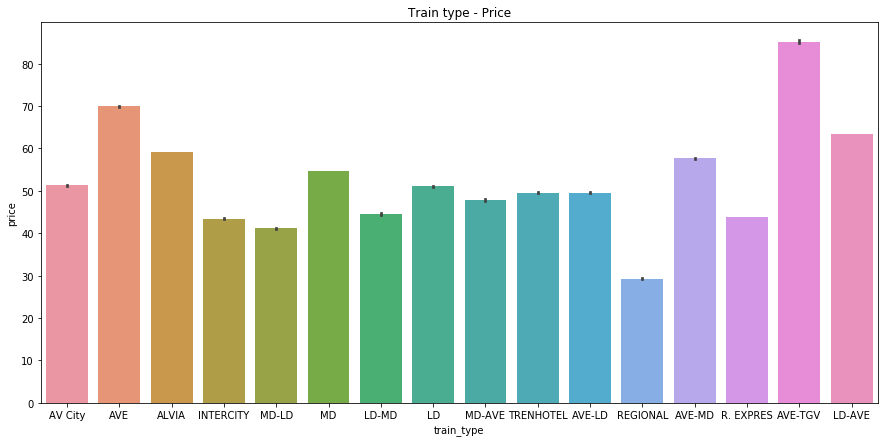

In [15]:
plt.figure(figsize=(15,7))
sns.barplot(x='train_type',y='price',data=df)
plt.title('Train type - Price')

### Changing the date and time values from string to numeric format

In [16]:
df = df.reset_index()
#df.drop(columns='level_0',inplace=True)
df.head()

,index,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,0,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.550000,Turista,Promo
1,1,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.400000,Turista,Promo
2,2,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.300000,Turista,Promo
3,3,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.400000,Preferente,Promo
4,4,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,63.385503,Turista,Promo


In [17]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = datetime.datetime.strptime(b, datetimeFormat)- datetime.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)

In [18]:
df['travel_time'] = df.apply(lambda x:fun(x['start_date'],x['end_date']),axis=1)
df.head()

,index,origin,destination,start_date,end_date,train_type,price,train_class,fare,travel_time
0,0,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.550000,Turista,Promo,2.933333
1,1,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.400000,Turista,Promo,2.533333
2,2,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.300000,Turista,Promo,2.350000
3,3,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.400000,Preferente,Promo,2.533333
4,4,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,63.385503,Turista,Promo,2.733333


To expand start date column :

In [21]:
df['start_date']=pd.to_datetime(df['start_date'])
df['start_date'+'_hour']=date.dt.hour
df['start_date'+'_month']=date.dt.month
df['start_date_day']=date.dt.weekday_name
df.head()

,index,origin,destination,start_date,end_date,train_type,price,train_class,fare,travel_time,end_date_hour,end_date_month,end_date_day,start_date_hour,start_date_month,start_date_day
0,0,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.550000,Turista,Promo,2.933333,9,5,Wednesday,9,5,Wednesday
1,1,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.400000,Turista,Promo,2.533333,9,5,Wednesday,9,5,Wednesday
2,2,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.300000,Turista,Promo,2.350000,9,5,Wednesday,9,5,Wednesday
3,3,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.400000,Preferente,Promo,2.533333,10,5,Wednesday,10,5,Wednesday
4,4,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,63.385503,Turista,Promo,2.733333,11,5,Wednesday,11,5,Wednesday


To expand end date column :

In [20]:
date = pd.to_datetime(df['end_date'])
df['end_date_hour']=date.dt.hour
df['end_date_month']=date.dt.month
df['end_date_day']=date.dt.weekday_name
df.head()

,index,origin,destination,start_date,end_date,train_type,price,train_class,fare,travel_time,end_date_hour,end_date_month,end_date_day
0,0,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.550000,Turista,Promo,2.933333,9,5,Wednesday
1,1,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.400000,Turista,Promo,2.533333,9,5,Wednesday
2,2,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.300000,Turista,Promo,2.350000,9,5,Wednesday
3,3,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.400000,Preferente,Promo,2.533333,10,5,Wednesday
4,4,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,63.385503,Turista,Promo,2.733333,11,5,Wednesday


## Checking Correlation

In [22]:
df.corr()

,index,price,travel_time,end_date_hour,end_date_month,start_date_hour,start_date_month
index,1.000000,0.008189,-0.010250,0.001252,-0.059824,0.001252,-0.059824
price,0.008189,1.000000,-0.277421,-0.005096,-0.134736,-0.005096,-0.134736
travel_time,-0.010250,-0.277421,1.000000,0.139101,0.107659,0.139101,0.107659
end_date_hour,0.001252,-0.005096,0.139101,1.000000,0.012084,1.000000,0.012084
end_date_month,-0.059824,-0.134736,0.107659,0.012084,1.000000,0.012084,1.000000
start_date_hour,0.001252,-0.005096,0.139101,1.000000,0.012084,1.000000,0.012084
start_date_month,-0.059824,-0.134736,0.107659,0.012084,1.000000,0.012084,1.000000


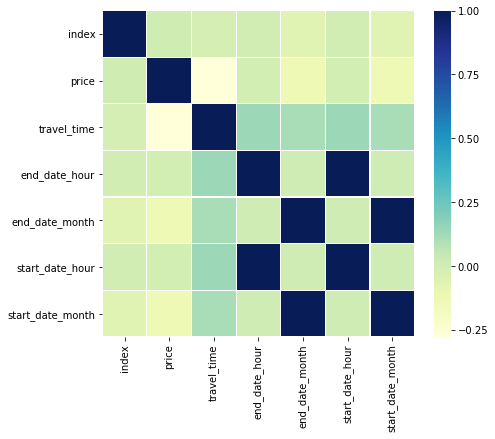

In [23]:
corrmat = df.corr() 
f, ax = plt.subplots(figsize =(7, 6)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

Removing redundant columns

In [24]:
df.drop(columns=['start_date','end_date','start_date_hour','end_date_hour','end_date_day','start_date_day','start_date_month','end_date_month'],inplace=True)
df.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time
0,0,MADRID,SEVILLA,AV City,38.550000,Turista,Promo,2.933333
1,1,MADRID,SEVILLA,AVE,53.400000,Turista,Promo,2.533333
2,2,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.350000
3,3,MADRID,SEVILLA,AVE,69.400000,Preferente,Promo,2.533333
4,4,MADRID,SEVILLA,ALVIA,63.385503,Turista,Promo,2.733333


In [25]:
lab_en = LabelEncoder()
df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])
df.iloc[:,6] = lab_en.fit_transform(df.iloc[:,6])

In [26]:
df.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time
0,0,1,3,1,38.550000,3,5,2.933333
1,1,1,3,2,53.400000,3,5,2.533333
2,2,1,3,2,47.300000,3,5,2.350000
3,3,1,3,2,69.400000,2,5,2.533333
4,4,1,3,0,63.385503,3,5,2.733333


In [27]:
X = df.iloc[:,[1,2,3,5,6,7]].values
Y = df['price'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

Applying Linear Regression

In [28]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lr.score(X_test,Y_test)

0.6267420169521478

In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [ ]:
clf=KNeighborsRegressor(5)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(mean_squared_error(y_test,y_pred))